<a href="https://colab.research.google.com/github/Sutharshana/Demo-primary-Website/blob/main/food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
#!/usr/bin/env python
# coding: utf-8

# Import required libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from skimage.color import rgb2gray
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import pickle
import sys
from tkinter import Tk, filedialog
from urllib import request
from PIL import Image




In [ ]:
# Create a directory to store the downloaded images
os.makedirs('Classification_Images_SouthIndian')




In [ ]:
# Install bing_image_downloader package
!pip install bing_image_downloader



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

# Import images using bing downloader
from bing_image_downloader import downloader


In [ ]:

# Define the target categories (South Indian food items)
Categories = ["idli", "dosa", "vada", "sambhar", "rasam", "poori", "chapathi", "briyani"]




In [ ]:
# Download images for each category
for category in Categories:
    downloader.download(category, limit=30, output_dir="Classification_Images_SouthIndian", adult_filter_off=True)




[%] Downloading Images to /content/Classification_Images_SouthIndian/idli


[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://recipes.timesofindia.com/thumb/53239358.cms?imgsize=176260&amp;width=800&amp;height=800
[%] File Downloaded !

[%] Downloading Image #2 from https://3.bp.blogspot.com/-fOV5tUVkTNc/V5Lpw_MeciI/AAAAAAAAOH4/fVZAESlALuoY91ZMRiralc4V8KbdeRgawCLcB/s1600/IMG_0021_Fotor.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://www.malaysiatrademart.com/data_images/idli.png
[%] File Downloaded !

[%] Downloading Image #4 from https://www.vegrecipesofindia.com/wp-content/uploads/2021/06/idli-recipe-1.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://hebbarskitchen.com/wp-content/uploads/mainPhotos/idli-recipe-how-to-make-idli-soft-idli-recipe-idli-with-idli-rava-2.jpeg
[%] File Downloaded !

[%] Downloading Image #6 from https://www.tarladalal.com/members/9306/big/big_idli-11576.jpg?size=696X905
[%] File D

In [ ]:
# Load and preprocess the image data
target = []
flat_data = []
images = []
DataDirectory = 'Classification_Images_SouthIndian'



In [ ]:
for category in Categories:
    target_class = Categories.index(category)
    path = os.path.join(DataDirectory, category)
    
    for img in os.listdir(path):
        img_array = imread(os.path.join(path, img))
        img_resized = resize(img_array, (150, 150, 3))
        flat_data.append(img_resized.flatten())
        images.append(img_resized)
        target.append(target_class)

flat_data = np.array(flat_data)
images = np.array(images)
target = np.array(target)




In [ ]:
# Create a DataFrame for the image data
df = pd.DataFrame(flat_data)
df['Target'] = target

In [ ]:
# Split the data into training and testing sets
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle=True, test_size=0.3, random_state=109, stratify=y)

In [ ]:
# Define the hyperparameters for the RandomForestClassifier
tuned_parameters = {'max_depth': [3, 5, 10, None],
                    'n_estimators': [10, 100, 200],
                    'max_features': [1, 3, 5, 7]}

In [ ]:
# Create the RandomForestClassifier and apply GridSearchCV to find the best parameters
r_clf = RandomForestClassifier()
cv = GridSearchCV(r_clf, tuned_parameters, refit=True, verbose=3)
cv.fit(x_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END max_depth=3, max_features=1, n_estimators=10;, score=0.118 total time=   0.1s
[CV 2/5] END max_depth=3, max_features=1, n_estimators=10;, score=0.294 total time=   0.1s
[CV 3/5] END max_depth=3, max_features=1, n_estimators=10;, score=0.147 total time=   0.1s
[CV 4/5] END max_depth=3, max_features=1, n_estimators=10;, score=0.091 total time=   0.1s
[CV 5/5] END max_depth=3, max_features=1, n_estimators=10;, score=0.091 total time=   0.1s
[CV 1/5] END max_depth=3, max_features=1, n_estimators=100;, score=0.265 total time=   0.2s
[CV 2/5] END max_depth=3, max_features=1, n_estimators=100;, score=0.529 total time=   0.2s
[CV 3/5] END max_depth=3, max_features=1, n_estimators=100;, score=0.294 total time=   0.2s
[CV 4/5] END max_depth=3, max_features=1, n_estimators=100;, score=0.182 total time=   0.2s
[CV 5/5] END max_depth=3, max_features=1, n_estimators=100;, score=0.182 total time=   0.2s
[CV 1/5] END max_depth=

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 10, None],
                         'max_features': [1, 3, 5, 7],
                         'n_estimators': [10, 100, 200]},
             verbose=3)

In [49]:
# Print the best parameters and the model after hyperparameter tuning
print("Best parameters to apply are:", cv.best_params_)
r = cv.best_estimator_
print("Model after tuning is:\n", r)


Best parameters to apply are: {'max_depth': 10, 'max_features': 7, 'n_estimators': 200}
Model after tuning is:
 RandomForestClassifier(max_depth=10, max_features=7, n_estimators=200)


In [50]:
# Make predictions on the test data
y_prediction = r.predict(x_test)

In [ ]:
# Display evaluation metrics
print("Confusion matrix results:\n", confusion_matrix(y_prediction, y_test))
print("\nClassification report of the model:\n", classification_report(y_prediction, y_test))
print("Accuracy score:", 100 * accuracy_score(y_prediction, y_test))

Confusion matrix results:
 [[7 1 0 1 1 0 2 0]
 [0 4 1 1 0 2 0 0]
 [0 2 3 2 1 2 1 1]
 [0 1 2 3 2 1 0 0]
 [0 0 0 0 4 2 0 2]
 [0 0 0 0 0 0 1 2]
 [1 1 0 0 0 1 5 1]
 [1 0 3 2 1 1 0 3]]

Classification report of the model:
               precision    recall  f1-score   support

           0       0.78      0.58      0.67        12
           1       0.44      0.50      0.47         8
           2       0.33      0.25      0.29        12
           3       0.33      0.33      0.33         9
           4       0.44      0.50      0.47         8
           5       0.00      0.00      0.00         3
           6       0.56      0.56      0.56         9
           7       0.33      0.27      0.30        11

    accuracy                           0.40        72
   macro avg       0.40      0.37      0.39        72
weighted avg       0.45      0.40      0.42        72

Accuracy score: 40.27777777777778


In [35]:
# Save the trained model
pickle.dump(r, open("Classification_Model_SouthIndian.p", "wb"))
#pickle.load(open("Classification_Model_SouthIndian.p", "rb"))

In [ ]:
test_model = pickle.load(open("Classification_Model_SouthIndian.p", "rb"))

In [38]:
#Provide the image path as a command-line argument
image_path = sys.argv[1]

Enter the URL of the image to test: 

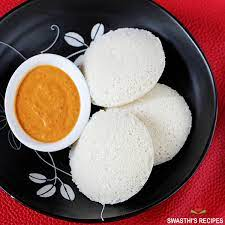

In [54]:
url = input("Enter the URL of the image to test: ")

In [55]:
#Download and preprocess the input image
from io import BytesIO

response = request.urlopen(url)
img_data = response.read()
img = Image.open(BytesIO(img_data))
img_resized = resize(np.array(img), (150, 150, 3))
flat_data = np.array([img_resized.flatten()])

In [56]:
#Make predictions on the input image
y_output = test_model.predict(flat_data)
y_output = Categories[y_output[0]]

Predicted output is: idli


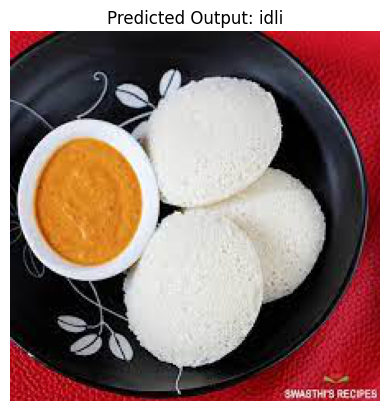

In [57]:
# Display the predicted output and the input image
print("Predicted output is:", y_output)
plt.imshow(img)
plt.axis('off')
plt.title("Predicted Output: " + y_output)
plt.show()
